In [1]:
# подключение основных библиотек
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [2]:
#подгружаем и просматриваем наш датасет на 1660 файлов
df = pd.read_csv('1660_films.csv')
df

,ID_kinopoisk,week,month,screens,budget,age_R,time,genre_box_buget,genre_avr_kinopoisk_R,genre_avr_box,...,skr2_box_buget,skr2_avr_kinopoisk_R,skr2_avr_box,skr2_avr_views,box_budget,kinopoisk_R,box,views,rezult,rezult4
0,70952.0,7,2,100,46096480.0,12.0,115.0,0.51,6.18,66377566,...,1.17,7.40,54000000.0,551000.0,1.17,7.4,54000000,551000,0,1
1,77396.0,14,4,117,57620600.0,0.0,98.0,0.94,5.23,181394667,...,0.78,4.80,45000000.0,464000.0,0.78,4.8,45000000,464000,0,0
2,79850.0,28,7,315,121003260.0,16.0,115.0,0.94,5.23,181394667,...,1.66,6.33,209666667.0,2029000.0,3.84,6.1,465000000,4400000,1,3
3,253754.0,40,9,47,46096480.0,12.0,101.0,0.51,6.18,66377566,...,0.25,5.90,24275000.0,124000.0,0.16,6.4,7300000,61000,0,0
4,252013.0,44,10,188,57620600.0,6.0,90.0,1.19,6.07,148983326,...,0.33,6.70,19000000.0,295000.0,0.33,6.7,19000000,295000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,4493006.0,15,4,1656,39100000.0,12.0,91.0,1.88,5.36,129218872,...,0.25,5.90,24275000.0,124000.0,0.52,6.3,20396022,75750,0,0
1657,4400163.0,15,4,235,51790451.0,18.0,75.0,0.51,6.18,66377566,...,0.02,0.00,881000.0,2634.0,0.02,6.0,881000,2634,0,0
1658,5059142.0,16,4,23,79817750.0,16.0,101.0,0.51,6.18,66377566,...,1.04,7.10,16541000.0,84123.0,0.29,6.0,82000,245,0,0
1659,5002368.0,16,4,66,79817750.0,18.0,120.0,0.51,6.18,66377566,...,0.00,0.00,496626.0,1411.0,0.29,6.0,496626,1411,0,0


In [3]:
#Отбираем признаки для работы и  столбец с откликами
cols = ["week", "month","screens","budget","age_R","time",
        "genre_box_buget","genre_avr_kinopoisk_R", "genre_avr_box","genre_avr_views",
        "genre2_box_buget","genre2_avr_kinopoisk_R","genre2_avr_box","genre2_avr_views",
        "dir_box_buget", "dir_avr_kinopoisk_R","dir_avr_box","dir_avr_views",
        "skr1_box_buget", "skr1_avr_kinopoisk_R", "skr1_avr_box", "skr1_avr_views",
        "skr2_box_buget", "skr2_avr_kinopoisk_R","skr2_avr_box", "skr2_avr_views"] # назначаем столбцы 
X = df[cols] # отбираем оцениваемые признаки-предикторы
y = df["kinopoisk_R"] # отбираем столбец с откликами

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Создаем объект MinMaxScaler
scaler = MinMaxScaler()

# Масштабируем признаки в X от 0 до 1
X = scaler.fit_transform(X)

# X_scaled теперь содержит отмасштабированные признаки


In [5]:
from sklearn.model_selection import train_test_split
#Делим выборку на тренинговую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) # делим выборку 70/30 - тренинговая/тестовая

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

In [35]:
# Создание нейросети
model = Sequential()
model.add(Dense(128, input_dim=26, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='linear'))


In [36]:
# Компиляция модели
model.compile(loss='mean_squared_error', optimizer='adam')


In [37]:
# Обратный вызов ModelCheckpoint для сохранения лучших весов модели
checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

In [38]:
# Обучение модели
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/150
37/37 [==============================] - 2s 10ms/step - loss: 33.1505 - val_loss: 27.3533
Epoch 2/150
37/37 [==============================] - 0s 6ms/step - loss: 9.5693 - val_loss: 1.7399
Epoch 3/150
37/37 [==============================] - 0s 6ms/step - loss: 1.8212 - val_loss: 1.4439
Epoch 4/150
37/37 [==============================] - 0s 6ms/step - loss: 1.4976 - val_loss: 1.1942
Epoch 5/150
37/37 [==============================] - 0s 6ms/step - loss: 1.2935 - val_loss: 1.0698
Epoch 6/150
37/37 [==============================] - 0s 6ms/step - loss: 1.1574 - val_loss: 0.9971
Epoch 7/150
37/37 [==============================] - 0s 6ms/step - loss: 1.0814 - val_loss: 0.9693
Epoch 8/150
37/37 [==============================] - 0s 6ms/step - loss: 1.0340 - val_loss: 0.9087
Epoch 9/150
37/37 [==============================] - 0s 6ms/step - loss: 0.9898 - val_loss: 0.8883
Epoch 10/150
37/37 [==============================] - 0s 6ms/step - loss: 0.9504 - val_loss: 0.8484
Epoch 

In [39]:
# Загрузка лучших весов модели
model.load_weights('best_model.h5')

In [40]:
# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

16/16 [==============================] - 0s 2ms/step


In [41]:
# Расчет метрик
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Вывод метрик
print("R2 score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 score: 0.754466615225763
Mean Squared Error: 0.3719101141843108
Mean Absolute Error: 0.42290152981668294


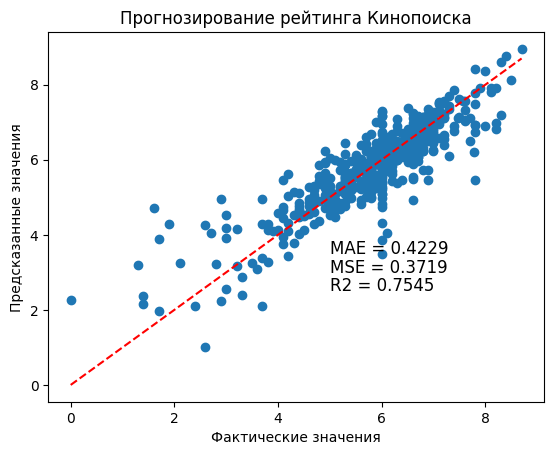

In [42]:
# Вывод графика
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.text(5, 2.5, 'R2 = {:.4f}'.format(r2), fontsize=12)
plt.text(5, 3.0, 'MSE = {:.4f}'.format(mse), fontsize=12)
plt.text(5, 3.5, 'MAE = {:.4f}'.format(mae), fontsize=12)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Прогнозирование рейтинга Кинопоиска")
plt.show()